<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Rossmann" data-toc-modified-id="Rossmann-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Rossmann</a></span><ul class="toc-item"><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data preparation</a></span><ul class="toc-item"><li><span><a href="#Experimenting-with-a-sample" data-toc-modified-id="Experimenting-with-a-sample-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Experimenting with a sample</a></span></li><li><span><a href="#Preparing-full-data-set" data-toc-modified-id="Preparing-full-data-set-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Preparing full data set</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Model</a></span></li></ul></li></ul></div>

---
本notebook在fastai v3 课程1的notebook基础上，运行出结果后，对相应**知识点进行补充或总结**，同时整理了相应的**xmind文档。**  

<img src="assests/lesson6/lesson6xmind.jpg" width="500">

xmind下载地址[点击这里](https://github.com/greebear/fast.ai-notes/blob/master/xmind/lesson6.xmind) 

---
<font color='green'>
    
**希望达到的效果**
- 回忆录：学过对应内容，浏览一遍nb后，就能快速回忆起知识点
- 优化工具：实践过程中，能在对应的笔记中快速找到调优方法

**学习方法推荐**
- 一边观看fastai视频一遍运行notebook
- 完成学习后，通过xmind笔记回忆所有知识点

<font color='blue'>
    
本notebook的内容与图片参考于：   
- fastai v3 lesson6 notebook [Lesson 6 - rossmann.ipynb](https://nbviewer.jupyter.org/github/fastai/course-v3/blob/master/nbs/dl1/lesson6-rossmann.ipynb) 

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
from fastai.tabular import *

# Rossmann

---
kaggle比赛 Rossmann Store Sales
- 比赛地址：https://www.kaggle.com/c/rossmann-store-sales
- 比赛内容：使用商店、促销和竞争对手数据预测销售
- 评估方法：Root Mean Square Percentage Error (RMSPE) 均方根百分比误差

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [5]:
# path = Config().data_path()/'rossmann'
path=Path('rossmann/')
train_df = pd.read_pickle(path/'train_clean')

---
**时间序列 - 对比**
- 计量经济学(enconmetrics)中：
    - 倾向于应用单一变量的时间序列 (a sequence of time point of one thing)
- 现实中(会出现多种多样的数据)：
    - 客户信息
    - 元数据metadata
    - 其他信息的时间序列
        - 相同时间段
        - 不同时间段
---  
**时间序列 - SOTA方案**
- 竞赛中对真实世界数据的处理 不倾向于应用RNN
- 将时间与Date与元数据Metadata进行特征组合
    - date
    - month
    - year
    - day of week
    - day of year
    - ...
- why?
    - 例子：  
        发薪日对人们支付行为有所形象，发薪日可能是每月15号，而你的元数据中包含了这个信息 day of year = 15  
        而要从模型从2015-07-31中自己判断出是每月15号这个信息就太难了。  
        所以更好的方法是对时间序列进行上述的预处理。  
- code
```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [6]:
train_df.head().T

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,False,False,False,False,False
SchoolHoliday,1,1,1,1,1


In [7]:
n = len(train_df); n

844338

### Experimenting with a sample

In [8]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Sales']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Sales']]

In [9]:
small_train_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
458,460,5,NaN,34050.0,55,5538
603,605,5,"Jan,Apr,Jul,Oct",10310.0,51,9969
889,892,5,NaN,19370.0,55,10054
3101,878,3,NaN,1100.0,50,9239
3667,330,2,"Mar,Jun,Sept,Dec",370.0,66,4251


In [10]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
425021,860,5,NaN,5980.0,91,5185
425318,42,4,"Jan,Apr,Jul,Oct",290.0,61,8275
425671,396,4,NaN,23130.0,58,8955
426183,912,4,NaN,3100.0,84,4504
427079,697,3,"Jan,Apr,Jul,Oct",3780.0,71,8281


---
**Categorify**
- 找到一类数据中字符串的唯一值，创建列表，将字符串变成数字
```python
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)
```
- 查看类别
```python
small_train_df.PromoInterval.cat.categories
```
- 查看唯一编码
```python
small_train_df['PromoInterval'].cat.codes[:5]
```
- 注意：用.head()查看数据时，外在现实的是字符串形式，而内在保存的是唯一编码形式。

In [11]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [12]:
small_test_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
425021,860,5,NaN,5980.0,91,5185
425318,42,4,"Jan,Apr,Jul,Oct",290.0,61,8275
425671,NaN,4,NaN,23130.0,58,8955
426183,912,4,NaN,3100.0,84,4504
427079,697,3,"Jan,Apr,Jul,Oct",3780.0,71,8281


In [13]:
small_train_df.PromoInterval.cat.categories

Index(['Feb,May,Aug,Nov', 'Jan,Apr,Jul,Oct', 'Mar,Jun,Sept,Dec'], dtype='object')

In [14]:
small_train_df['PromoInterval'].cat.codes

458      -1
603       1
889      -1
3101     -1
3667      2
         ..
423770    0
424206    1
424261    1
424442    0
424869   -1
Length: 1000, dtype: int8

In [15]:
small_train_df['PromoInterval'].cat.codes[:5]

458    -1
603     1
889    -1
3101   -1
3667    2
dtype: int8

---
**Fill Missing**
- 为数据多添加一列xxx_na数据，用于表示单条数据是否存在缺失情况  
    本例中CompetitionDistance出现数据缺失，加入了CompetitionDistance_na列数据
    ```python
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)
    ```
- 备注：  
    这里CompetitionDistance是连续变量  
    对于缺失指，我们可以用任意数字去代替它  
    后面模型预测的时候，如果发现数据缺失是一个重要因素的话  
    可以在CompetitionDistance_na获取到信息  

In [16]:
fill_missing = FillMissing(small_cat_vars, small_cont_vars)
fill_missing(small_train_df)
fill_missing(small_test_df, test=True)

In [17]:
small_train_df[small_train_df['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na
140790,291,6,NaN,2240.0,81,4842,True
297957,291,5,NaN,2240.0,58,8683,True
380715,291,5,NaN,2240.0,65,6224,True


### Preparing full data set

In [18]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [19]:
len(train_df),len(test_df)

(844338, 41088)

In [20]:
procs=[FillMissing, Categorify, Normalize]

In [21]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw',
    'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [22]:
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [23]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [24]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [25]:
valid_idx = range(cut)

In [26]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [27]:
valid_idx

range(0, 41395)

---
**创建databunch**
- `log=True`：
    - 备注：为什么log=True，Jeremy课上讲的可能稍有错误
    - 知乎解答：https://www.zhihu.com/question/28676215/answer/226589921
    - 论坛上的讨论：https://forums.fast.ai/t/how-does-log-of-y-and-y-pred-make-a-rmspe-to-rmse/48713/2
    - 处理长尾分布
- `label_cls=FloatList`：告诉模型处理的是回归问题

In [28]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [29]:
# doc(FloatList)

## Model

In [30]:
max_log_y = np.log(np.max(train_df['Sales'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

**tabular_learner**
- `layers=[1000,500]`：模型大概有1000 * 50 = 500,000 个参数
- `ps=[0.001,0.01]`：
    - dropout ：https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf
    - 训练时启动dropout
        - 预测值为w
        - 失活概率p
    - 预测时关闭dropout
        - 预测值为pw
    - 伯努利分布
    - list中有多个值的时候，各个数值代表的是各层的随机失活概率p；  
        仅有一个值的时候，代表的是每层的随机失活概率p都一致。
- `emb_drop=0.04`：
    - 特殊随机失活 special embeding dropout
    - 备注：我们只对embdeding的数据进行随机失活，而连续变量则保持原样

In [31]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

---
查看模型

In [32]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(4, 3)
    (19): Embedding(4, 3)
    (20): Embedding(9, 5)
    (21): Embedding(9, 5)
    (22): Embedding(3, 3)
    (23): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=233, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

---
(bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)层的解读  

**`bn_cont`**
- 批量归一化 Batch Normalization
    - 论文：https://arxiv.org/abs/1502.03167
    - 两年后其他人的解读，与原论文观点不同：https://zhuanlan.zhihu.com/p/52132614
- fastai中的BatchNorm1d
    - 其中的一个参数momentum是指数加权移动平均(exponentially weighted moving average)
    - fastai代码实现中没有为每个batch取平均值和标准差 -- 这样做每个batch之间会有差异导致很难训练
    - 实际上应用的是指数加权移动平均值(exponentially weighted moving average)
    - momentum
        - 值较小：均值和标准差在批量之间的差异比较小，正则化效果也将减小
        - 值较大：均值和标准差在批量之间的差异比较大，正则化效果也将增加
- 让我们可以用更大的学习率训练模型
---

**使用dropout或正则化(weight decay, L2 norms)的比例？**
- weight decay和L2正则化两者都在做同一件事情
    我们经常使用weight decay而不是使用L2 正则化
- 正则化
    - 随机失活dropout
    - 正则化regularization
        - weight decay
        - L2正则化
    - 批量归一化batch norm
        - 视频原话 “kind of has a regularizing effect”
    - 数据增强data augmentation
---

In [33]:
len(data.train_ds.cont_names)

16

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


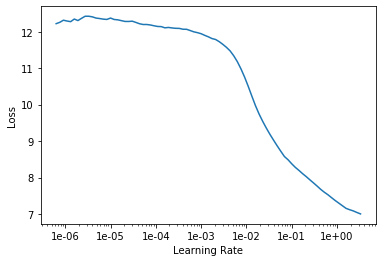

In [35]:
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(4, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.022331,0.036660,0.154718,02:52
1,0.017715,0.017249,0.134069,02:58
2,0.013302,0.012914,0.110222,02:57
3,0.011143,0.011449,0.103508,02:56


In [37]:
learn.save('1')

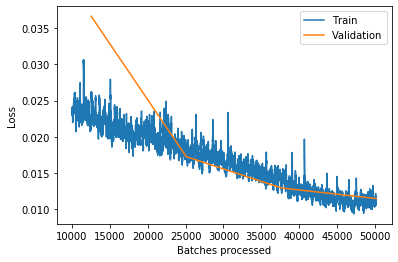

In [38]:
learn.recorder.plot_losses(skip_start=10000)

In [41]:
learn.load('1');

In [42]:
learn.fit_one_cycle(5, 1e-4)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.010717,0.011350,0.103490,02:59
1,0.011065,0.011506,0.104101,02:57
2,0.009881,0.011352,0.105086,02:59
3,0.010583,0.011965,0.104603,02:56
4,0.009061,0.011473,0.103457,02:58


In [43]:
learn.fit_one_cycle(5, 1e-4/2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.009314,0.011515,0.105761,03:21
1,0.009936,0.012509,0.105798,03:08
2,0.009759,0.011665,0.103951,03:11
3,0.008235,0.011349,0.103334,03:02
4,0.009394,0.010874,0.102447,03:08


(10th place in the competition was 0.108)

In [44]:
test_preds=learn.get_preds(DatasetType.Test)
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]
test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)